# Investigate Difference in Mean Time in Hospital Between Diabetic Men and Women

### Introduction

This project will use the "Diabetes 130-US hospitals for years 1999-2008 Data Set," sourced from the UCI Machine Learning Repository database to answer the inferential question of whether there is a difference in mean time in hospital stay between sex hospitalized diabetic patients in the United States. This data set represents 10 years (1999-2008) of clinical data at 130 US hospitals extracted from the database of encounters and includes over 50 features representing patient and hospital outcomes (Strack et al., 2014). Determining a difference in the mean length of time in hospital (measured in days) between the sexes, will help identify whether more consideration is needed in managing diabetes care in hospital for a particular sex.

Diabetes Mellitus is defined as a syndrome of hyperglycemia (high blood sugar levels) that can be classified into type 1 and type 2 (Bennet, 2020). The chronic and complex nature of diabetes can increase the need for these patients to be admitted into hospital for further treatment and monitoring leading to increases in costs for the healthcare system (Choi et al., 2021).

The length-of-stay (LOS) at a hospital is an important quantitative measure of patient outcomes and quality of care (Thomas, 1997). A study by Lingsma et al., discovered that at the patient level, patients in the upper quartile of LOS had an increased odds of mortality than those who were lower (Lingsma et al., 2018). Patients with diabetes were more likely than those without diabetes to have more hospital days (Comino et al., 2015). 

## Methods and Results

First the dataset we are using must be cleaned and modified to allow easier analysis. We start by loading our necessary libraries.

In [1]:
library(tidyverse)
library(infer)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


We then read our dataset and filter any null entries which can not be used for data analysis as shown in Table 1

In [2]:
# Read dataset from the web into R
# Cleaned the dataset and selected variables of interest
diabetes_data <- read_csv("https://raw.githubusercontent.com/Yanjun0526/STAT201Project/main/diabetic_data.csv") |>
    filter(gender != "Unknown/Invalid") |> 
    select(gender, time_in_hospital)
head(diabetes_data)

Rows: 101766 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (37): race, gender, age, weight, payer_code, medical_specialty, diag_1, ...
dbl (13): encounter_id, patient_nbr, admission_type_id, discharge_dispositio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gender,time_in_hospital
<chr>,<dbl>
Female,1
Female,3
Female,2
Male,2
Male,1
Male,3


**TABLE 1:** *Diabetes Data limited to "Gender", and "Time in Hospital"*

Table 2 is the total count of each gender within our dataset.

In [3]:
# Number of two categories
diabetes_data |>
    select(gender, time_in_hospital) |>
    group_by(gender) |> 
    tally()

gender,n
<chr>,<int>
Female,54708
Male,47055


**TABLE 2:** *Tally of Data Points by "Gender"*

Table 3 is a tibble of the mean of the time spent hospitalised of each gender.

In [4]:
# Mean time in hospital of two categories
diabetes_data |>
    group_by(gender) |> 
    summarize(mean_time_in_hospital = mean(time_in_hospital))

gender,mean_time_in_hospital
<chr>,<dbl>
Female,4.478797
Male,4.299777


**TABLE 3:** *Mean Time in Hospital grouped by "Gender"*

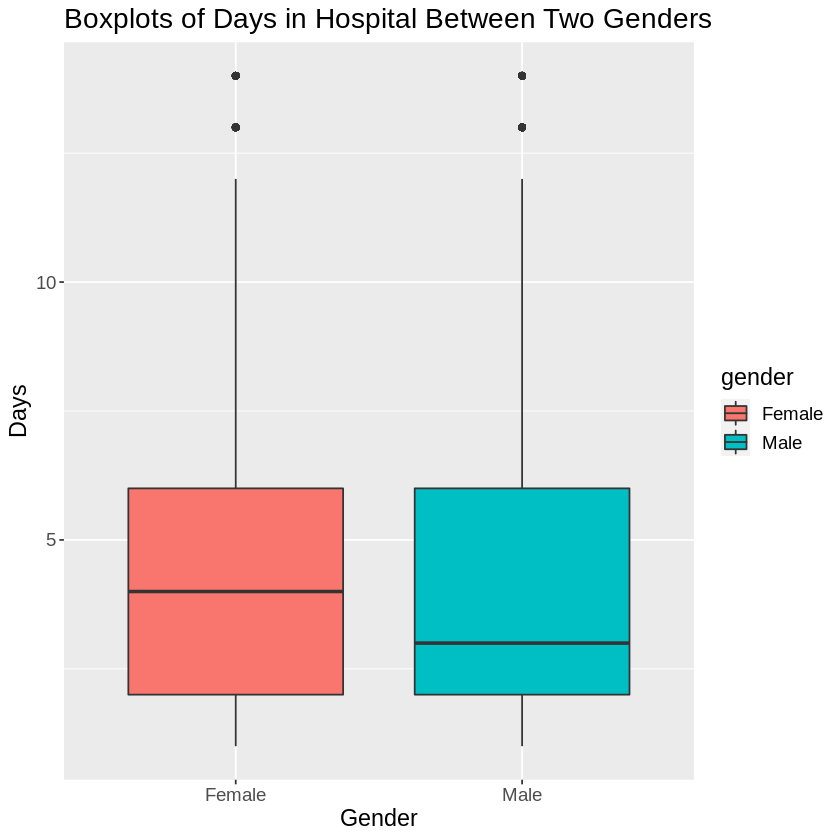

In [5]:
# Boxplots of days in hospital between two categories
boxplots <- 
    diabetes_data %>%  
    ggplot(aes(x = gender, y = time_in_hospital, fill = gender)) + 
    geom_boxplot() + 
    ylab("Days") +
    xlab("Gender") +
    ggtitle("Boxplots of Days in Hospital Between Two Genders") +
    theme(text = element_text(size=14)) 

boxplots

**GRAPH 1:** *Boxplot of Distribution of Days in Hospital grouped by "Gender"*

The dataset was uploaded to GitHub and was read into Jupyter Notebook. The sample size of the dataset is large enough, with more than 100,000 entries. Exploratory data analysis was conducted to identify patterns and outliers. Based on our analysis,  the variables 'gender' and 'time_in_hospital' were selected and formed the following hypotheses

**Hypothesis:
$H_0: \mu = \mu_0$ vs $H_1: \mu \neq \mu_0$ ($\mu_0$ = mean length of stay of men, $\mu$ = mean length of stay of women)**

The following analysis focused on the difference in the duration of stay between the gender of hospitalized diabetic patients. We implemented a simulation-based bootstrapping hypothesis test method utilizing point estimate and interval estimation to determine if there is a difference in the mean length of hospitilisation between males and females.

## Data

### Simulation-based Bootstrapping Hypothesis Test Method

In [6]:
set.seed(1)

# Calculate the observed difference in means in our sample
obs_diff_in_means <- diabetes_data |> 
    specify(formula = time_in_hospital ~ gender) |> 
    calculate(stat = "diff in means", order = c("Female", "Male"))

obs_diff_in_means

stat
<dbl>
0.1790197


**TABLE 4:** *Calculated Observed Difference in Means*

   The calculated observed difference of means in days hopitalized,  calculated from the data, grouped by sex is 0.1790197 days. 

In [7]:
set.seed(2)

# The simulated null model for the difference in means
null_diff_in_means <- 
    diabetes_data %>% 
    specify(formula = time_in_hospital ~ gender) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 200, type = "permute")  |>
    calculate(stat = "diff in means", order = c("Female", "Male"))

head(null_diff_in_means)

replicate,stat
<int>,<dbl>
1,0.029080139
2,-0.002860577
3,0.016983778
4,0.016707064
5,0.022518061
6,-0.004520862


**TABLE 5:** *The data of simulated null model for the difference in means*

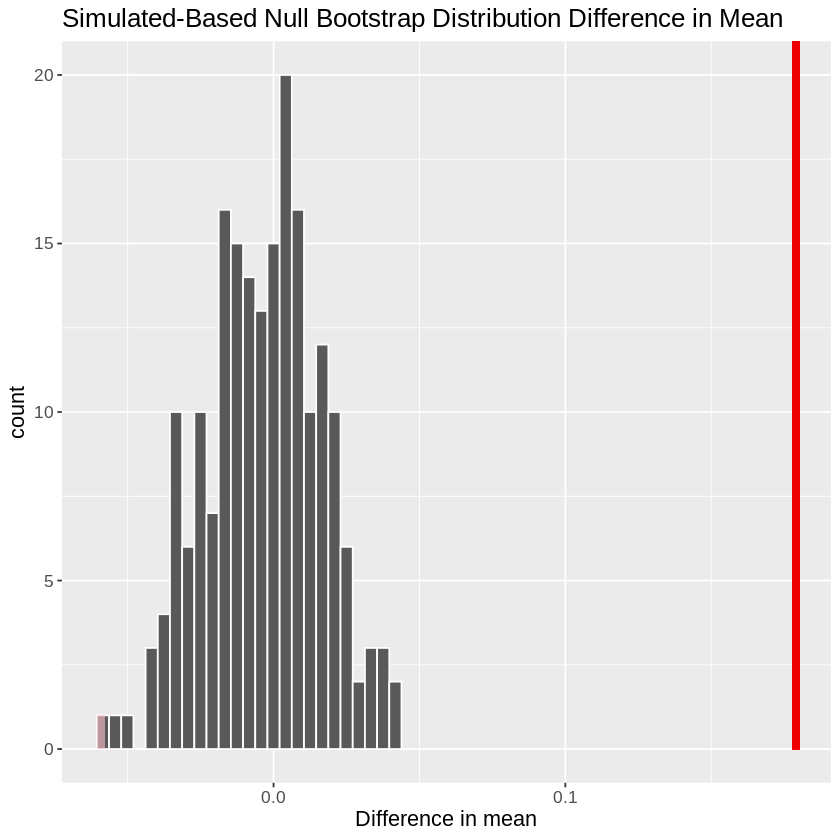

In [8]:
# Produce visualization of null bootstrap distribution
# We specify and calculate the difference in mean test statistic for our bootstrap model using 200 replicates.
diff_in_means_plot <-
    visualize(null_diff_in_means, bins = 25) + 
    shade_p_value(obs_stat = obs_diff_in_means, direction = "both") +
    xlab("Difference in mean") +
    theme(text = element_text(size = 13)) +
    ggtitle("Simulated-Based Null Bootstrap Distribution Difference in Mean")
diff_in_means_plot

**GRAPH 2:** *Simulated-Based Null Bootstrap Distribution Difference in Mean* 

Graph 2 visually demonstrates that our observed difference in means is far outside the range of our generated null distribution. This means that the observed difference is irregular according to the data and the null distribution.

In [9]:
# Calculate p-value from null model
p_value <-
    null_diff_in_means %>% 
    get_p_value(obs_stat =  obs_diff_in_means, direction = "both")
p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


The p-value of zero is due to the simulation-based nature of the infer package according to the function documentation of get_p_value. The get_p_value output is an approximation based on the number of reps chosen in the generate() step. This indicates that observed statistic is very unlikely given the null hypothesis, and only a small number of reps have been generated to form a null distribution. 

In [10]:
set.seed(2)
# Generate bootstrap distribution of difference in means with 200 replicants
diff_in_means_bootstrap_dist <- 
    diabetes_data %>%
    specify(formula = time_in_hospital ~ gender) %>%
    generate(reps = 200, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Female", "Male"))

# Generate 95% confidence interval
diff_in_means_ci <- 
    diff_in_means_bootstrap_dist %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
diff_in_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.146938,0.2196178


**TABLE 6:** *The 95% confidence interval calculated from our difference in mean bootstrap distribution*

The confidence interval calculated from our bootstrap distribution of the difference in mean, (Table 5) appears to exclude the null hypothesis value of zero when using a confidence level of 95% . Because the confidence interval does not capture the null hypothesis value we conclude that the observed difference in mean is statistically significant.

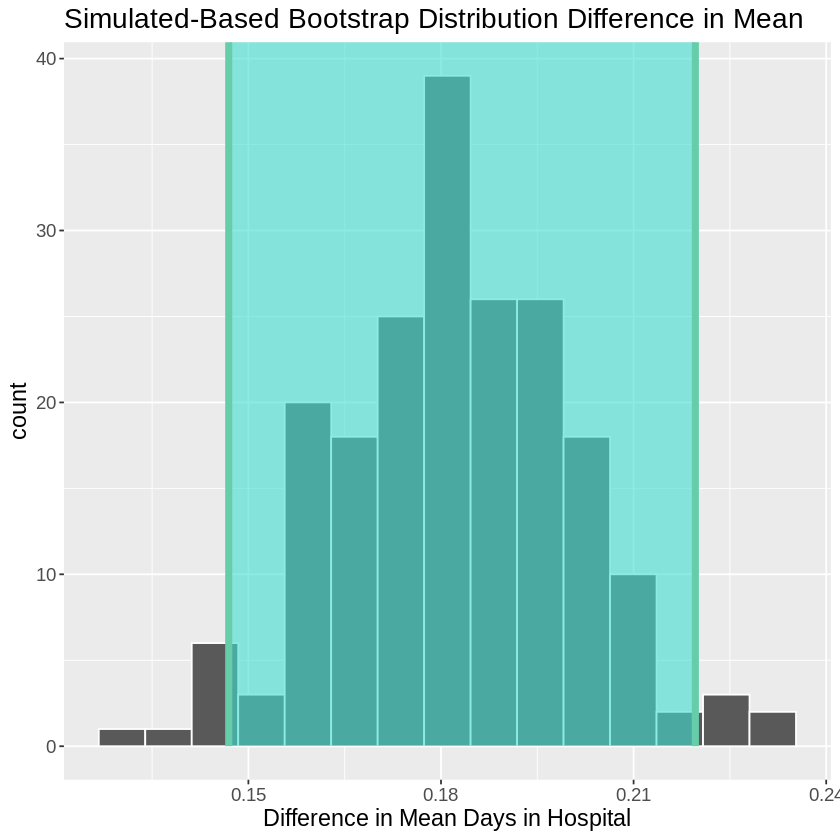

In [11]:
# Produce visualization for bootstrap distribution
diff_in_means_ci_plot <-
    visualize(diff_in_means_bootstrap_dist) + 
    shade_confidence_interval(endpoints = diff_in_means_ci) + 
    theme(text = element_text(size = 14)) + 
    xlab("Difference in Mean Days in Hospital") +
    ggtitle("Simulated-Based Bootstrap Distribution Difference in Mean")
diff_in_means_ci_plot

**Graph 3:** A visualization of the confidence interval around generated bootstrap distribution.

### Theory Based Hypothesis Test

In [12]:
p_value_diff_means <- tidy(
                   t.test(x = diabetes_data %>% filter(gender == "Female") %>% pull(time_in_hospital), 
                          y = diabetes_data %>% filter(gender == "Male") %>% pull(time_in_hospital),
                          alternative = "two.sided",
                         conf.level = 0.95)
               )
p_value_diff_means

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.1790197,4.478797,4.299777,9.540878,1.446741e-21,99425,0.1422436,0.2157958,Welch Two Sample t-test,two.sided


**TABLE 7:** *Tidy table of the result produced by t.test() function*

The p-value of alpha = 0.05, 95% confidence interval, and test statistic for difference in means is calculated using the t.test function. The confidence interval achieved by this method is consistent with that generated from our bootstrap simulation. The very small p-value of 1.446741e-21 is calculated in this function, unlike the result of 0 produced using the get_p_value function of the infer model. Considering the p-value is below our alpha value of 0.05 and the confidence interval does not capture the null hypothesis value we can say with 95% confidence reject the null hypothesis.- Bootstrapping VS. Asymptotics

*Bootstrapping VS. Asymptotics*

Given the large sample size and the approximate normal distribution of the data, it is reasonable to assume that the Central Limit Theorem applies. Asymptotic methods are known to be more efficient in terms of computational resources and provide more precise estimates of population parameters when sample sizes are large and the data distribution is approximately normal. In this case, both bootstrapping and asymptotics gave very similar results, suggesting that either method could be used for analyzing the data.

However, we believe that asymptotics is more appropriate in this case since it is more efficient and provides more precise estimates of population parameters. This is particularly important when dealing with large datasets, as bootstrapping can be computationally intensive and require a lot of computing power. Additionally, asymptotics is a well-established and widely used method in statistical inference, which adds to its credibility and trustworthiness.

In general, while both methods can be appropriate for analyzing the data, we believe that asymptotics is more appropriate in this case due to the large sample size and approximate normal distribution of the data, and the efficiency and precision of the method.

### Discussion

The objective of this report aims to investigate the difference in the duration of stay between the sexes of hospitalized diabetic patients. The sample size of the data is large enough, with more than 100,000 individuals.

**Hypothesis:
$H_0: \mu = \mu_0$ vs $H_1: \mu \neq \mu_0$ ($\mu_0$ = mean length of stay of men, $\mu$ = mean length of stay of women)**

The research on Gender Differences in Living with Diabetes Mellitus suggests that males have better sugar control than females and hence the effects of diabetes are less severe (Siddiqui et al., 2013). This would result in longer hospitalization times for females on average when compared to men. Based on the above analysis, it could be concluded that there is a difference in the average length of hospital stay between males and females. Specifically, women on average are hospitalised for slightly longer than men sitting at a difference of 0.1790197 days. This was supported with a p-value extremely close to 0, resulting in the null hypothesis being rejected. Therefore, the results extrapolated from the methods of this report align with the initial background research and expectations.

The identification of sex disparities in hospitilisation time can enable targeted treatment strategies and inform healthcare policy choices regarding diabetes care. Further research could include the investigation of reducing sex disparities in diabetes care on patient outcomes and healthcare expenditures, and how the different types of diabetes (type 1 and type 2) can affect the length of hospital stay diabetic patients. An investigation that could help the medical work in the future could be one into how age groups affect the length of hospitalised time in diabetic patients. This would allow researchers to understand which age groups are more prone to more severe reactions, and prepare accordingly in the hospital. It also must be investigated outside of data analysis whether or not the disparity in hospitilisation time is due to more severe reactions to diabetes in women, or if there potentially could be a bias in treatment between the two sexes. By answering these research questions, it could provide insights into the factors that influence hospitilisation time for diabetic patients, and hence assist healthcare providers, policymakers and researchers develop more effective strategies for managing diabetes care in women and potentially reducing healthcare costs.



### References

Bennett, J. (2020). ClinicalKey. Clinicalkey.com. https://www.clinicalkey.com/#

Choi, J., Booth, G., Jung, H. Y., Lapointe-Shaw, L., Tang, T., Kwan, J. L., Rawal, S., Weinerman, A., Verma, A., &amp; Razak, F. (2021, April 1). Association of diabetes with frequency and cost of hospital admissions: A retrospective cohort study. CMAJ Open. Retrieved March 17, 2023, from https://www.cmajopen.ca/content/9/2/E406 

Comino, E. J., Harris, M. F., Islam, M. D. F., Tran, D. T., Jalaludin, B., Jorm, L., Flack, J., &amp; Haas, M. (2015, January 22). Impact of diabetes on hospital admission and length of stay among a general population aged 45 year or more: A record linkage study. BMC health services research. Retrieved March 17, 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4310177/ 

Lingsma, H. F., Bottle, A., Middleton, S., Kievit, J., Steyerberg, E. W., &amp; Marang-van de Mheen, P. J. (2018, February 14). Evaluation of hospital outcomes: The relation between length-of-stay, readmission, and mortality in a large international administrative database - BMC Health Services Research. BioMed Central. Retrieved March 17, 2023, from https://bmchealthservres.biomedcentral.com/articles/10.1186/s12913-018-2916-1 

Siddiqui, M. A., Khan, M. F., & Carline, T. E. (2013). Gender differences in living with diabetes mellitus. Materia socio-medica, 25(2), 140–142. https://doi.org/10.5455/msm.2013.25.140-142

Strack, B., DeShazo, J. P., Gennings, C., Olmo, J. L., Ventura, S., Cios, K. J., &amp; Clore, J. N. (2014). Impact of hba1c measurement on hospital readmission rates: Analysis of 70,000 clinical database patient records. BioMed Research International, 2014, 1–11. https://doi.org/10.1155/2014/781670 

Thomas, J. W., Guire, K. E., & Horvat, G. G. (1997). Is patient length of stay related to quality of care?. Hospital & health services administration, 42(4), 489–507. 

